In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the preprocessing and feature extraction functions from your package
from forecastflow.preprocess import (
    handle_missing_data,
    resample_data,
    detrend_data,
    extract_all_features
)

In [2]:
# Load the sample time series data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
data = pd.read_csv(url, header=0, index_col=0, parse_dates=True, squeeze=True)

C:\Users\wcyan\AppData\Local\Temp\ipykernel_8296\1182244551.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  data = pd.read_csv(url, header=0, index_col=0, parse_dates=True, squeeze=True)


In [3]:
# Create a date range for the dataset
date_rng = pd.date_range(start='1981-01-01', end='1990-12-31', freq='D')

# Introduce missing values
data_with_missing = data.copy()
data_with_missing[30:35] = np.nan

In [8]:
# Handle missing data using linear interpolation
filled_data = handle_missing_data(data_with_missing, method='interpolation', order=1, inplace=False)

# Resample the data to monthly frequency
monthly_data = resample_data(data, freq='M')

# Detrend the data using seasonal decomposition
detrended_data = detrend_data(data, method='seasonal_decomposition', period=365)

# Extract features from the time series data
features = extract_all_features(data)

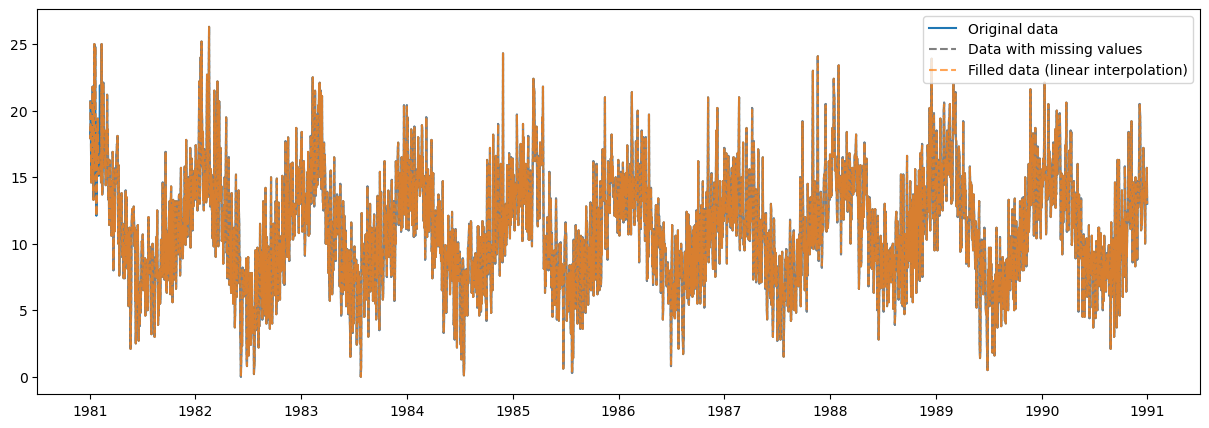

In [12]:
# Plot the original data, data with missing values, and filled data
plt.figure(figsize=(15, 5))
plt.plot(date_rng[2:], data, label='Original data', linestyle='-')
plt.plot(date_rng[2:], data_with_missing, label='Data with missing values', linestyle='--', color='gray')
plt.plot(date_rng[2:], filled_data, label='Filled data (linear interpolation)', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

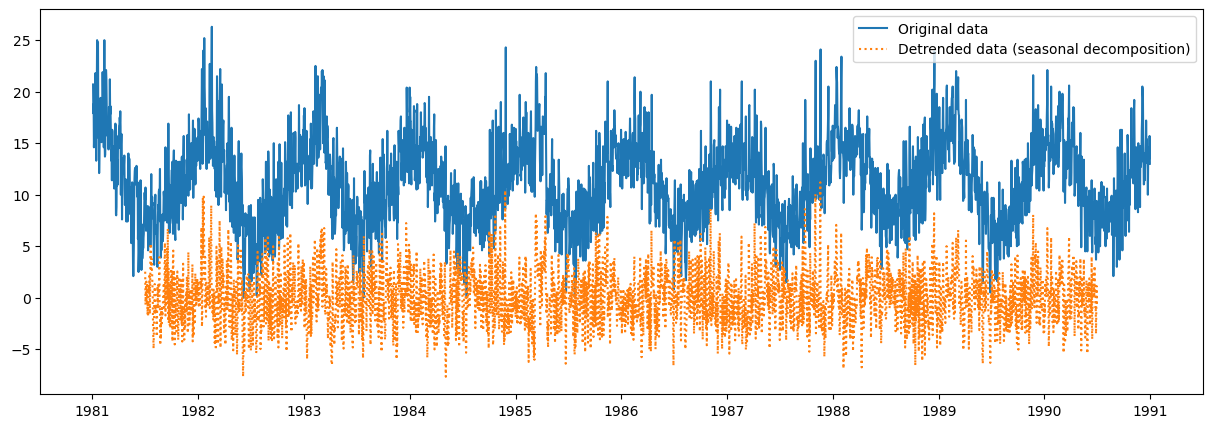

mean: 11.177753424657535
std: 4.07183689939719
min: 0.0
max: 26.3
skew: 0.1722124987194113
kurtosis: -0.06466173319838697
autocorrelation: [1.         0.774268   0.6302866  0.58529312 0.57774567 0.57728013
 0.57510412 0.57437039 0.56782622 0.56120131 0.54668689 0.53793111
 0.54012564 0.54247126 0.53688723 0.53429917 0.53043593 0.52911166
 0.53037444 0.52280732 0.52303677]
partial_autocorrelation: [1.         0.77448019 0.07699674 0.18937821 0.15207736 0.12986503
 0.10956843 0.10332764 0.07450564 0.07034827 0.03553812 0.04816911
 0.0607294  0.05116698 0.03279458 0.04563167 0.03194592 0.03967366
 0.04141383 0.01433579 0.04173451]
rolling_mean: Date
1981-01-01      NaN
1981-01-02      NaN
1981-01-03      NaN
1981-01-04      NaN
1981-01-05      NaN
              ...  
1990-12-27    13.90
1990-12-28    13.54
1990-12-29    13.42
1990-12-30    13.45
1990-12-31    13.44
Name: Temp, Length: 3650, dtype: float64
rolling_std: Date
1981-01-01         NaN
1981-01-02         NaN
1981-01-03         N

In [18]:
# Plot the original data and detrended data
plt.figure(figsize=(15, 5))
plt.plot(date_rng[2:], data, label='Original data', linestyle='-')
plt.plot(detrended_data.index, detrended_data, label='Detrended data (seasonal decomposition)', linestyle=':')
plt.legend()
plt.show()

# Display the extracted features
for key, value in features.items():
    print(f"{key}: {value}")